In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cortex import Cortex

## Instantiate Model

In [9]:
min_visual_activation = 0.83
visual_activation_decrement = 0.05

default_edge_weight = 1.0
boost_constant = 0.01

cortex = Cortex(
    min_visual_activation = min_visual_activation,
    visual_activation_decrement = visual_activation_decrement,
    default_edge_weight = default_edge_weight, 
    boost_constant = boost_constant
    )

## Train on Digits

In [10]:
X = np.load('data/mnist-processed/X.npy')
y = np.load('data/mnist-processed/y.npy', allow_pickle=True)

train_samples = 1000
train_start_ix = 0
test_samples = 1000
test_start_ix = 50000

print('Training')
for i in range(train_start_ix, train_start_ix + train_samples):
    cortex.learn_association(('visual', X[i]), ('text', y[i]))

print('Testing')
cortex.learning.set_learning(False)
total = 0
correct = 0
incorrect_indexes = []
for i in range(test_start_ix, test_start_ix + test_samples):
    cortex.force_visual_perception(X[i])
    cortex.propagate_activations()
    pred = cortex.get_most_active_col(input_type = 'text')
    cortex.reset()

    if pred.reference == y[i]: 
        correct += 1
    else:
        incorrect_indexes.append(i)
    total += 1

print('{} / {} -> {}'.format(correct, total, (correct / total)))
print('Num Columns:', len(cortex.columns))

Training
Testing
850 / 1000 -> 0.85
Num Columns: 478


## Train on Fashion

In [59]:
X = np.load('data/fashion-mnist-processed/X.npy')
y = np.load('data/fashion-mnist-processed/y.npy', allow_pickle=True)

X = X

train_samples = 10000
train_start_ix = 0
test_samples = 1000
test_start_ix = 50000

cortex.learning.set_learning(True)

print('Training')
for i in range(train_start_ix, train_start_ix + train_samples):
    cortex.learn_association(('visual', X[i]), ('text', y[i]))

print('Testing')
cortex.learning.set_learning(False)
total = 0
correct = 0
incorrect_indexes = []
for i in range(test_start_ix, test_start_ix + test_samples):
    cortex.force_visual_perception(X[i])
    cortex.propagate_activations()
    pred = cortex.get_most_active_col(input_type = 'text')
    cortex.reset()

    if pred.reference == y[i]: 
        correct += 1
    else:
        incorrect_indexes.append(i)
    total += 1

print('{} / {} -> {}'.format(correct, total, (correct / total)))
print('Num Columns:', len(cortex.columns))

Training
Testing
821 / 1000 -> 0.821
Num Columns: 9751


## Test Fashion or Digit Classification

In [102]:
# teach digits
cortex.learn_association(('text', 0), ('text', 'digit'))
cortex.learn_association(('text', 1), ('text', 'digit'))
cortex.learn_association(('text', 2), ('text', 'digit'))
cortex.learn_association(('text', 3), ('text', 'digit'))
cortex.learn_association(('text', 4), ('text', 'digit'))
cortex.learn_association(('text', 5), ('text', 'digit'))
cortex.learn_association(('text', 6), ('text', 'digit'))
cortex.learn_association(('text', 7), ('text', 'digit'))
cortex.learn_association(('text', 8), ('text', 'digit'))
cortex.learn_association(('text', 9), ('text', 'digit'))

# teach fashion
cortex.learn_association(('text', 't-shirt'), ('text', 'fashion'))
cortex.learn_association(('text', 'trouser'), ('text', 'fashion'))
cortex.learn_association(('text', 'pullover'), ('text', 'fashion'))
cortex.learn_association(('text', 'dress'), ('text', 'fashion'))
cortex.learn_association(('text', 'coat'), ('text', 'fashion'))
cortex.learn_association(('text', 'sandal'), ('text', 'fashion'))
cortex.learn_association(('text', 'shirt'), ('text', 'fashion'))
cortex.learn_association(('text', 'sneaker'), ('text', 'fashion'))
cortex.learn_association(('text', 'bag'), ('text', 'fashion'))
cortex.learn_association(('text', 'boot'), ('text', 'fashion'))

In [104]:
X_digits = np.load('Xp.npy')
y_digits = np.load('y.npy', allow_pickle=True)

X_fashion = X
y_fashion = y

correct_digits = 0
total_digits = 0
for i in range(51000, 52000):
    cortex.force_visual_perception(X_digits[i])
    for _ in range(2):
        cortex.propagate_activations()
    
    digit_confidence = None
    fashion_confidence = None
    for c in cortex.columns:
        if c.input_type == 'text' and c.reference == 'digit':
            digit_confidence = c.activation
        if c.input_type == 'text' and c.reference == 'fashion':
            fashion_confidence = c.activation
    
    if digit_confidence > fashion_confidence:
        correct_digits += 1
    total_digits += 1

    cortex.reset()

correct_fashion = 0
total_fashion = 0
for i in range(51000, 52000):
    cortex.force_visual_perception(X_fashion[i])
    for _ in range(2):
        cortex.propagate_activations()
    
    digit_confidence = None
    fashion_confidence = None
    for c in cortex.columns:
        if c.input_type == 'text' and c.reference == 'digit':
            digit_confidence = c.activation
        if c.input_type == 'text' and c.reference == 'fashion':
            fashion_confidence = c.activation
    
    if digit_confidence < fashion_confidence:
        correct_fashion += 1
    total_fashion += 1

    cortex.reset()

print('Digit Accuracy: ', correct_digits / total_digits)
print('Fashion Accuracy: ', correct_fashion / total_fashion)

Digit Accuracy:  0.971
Fashion Accuracy:  0.999


In [63]:
cortex.reset()
cortex.percieve_input(input_type = 'visual', input = X_fashion[51001])
cortex.propagate_activations()
cortex.propagate_activations()
cols = cortex.get_active_cols()
for c in cols:
    if c.input_type == 'text':
        print('Reference: ', c.reference)
        print('Activation: ', c.activation)
        print('Propagated: ', c.propagated)
        print()

cortex.reset()

Reference:  t-shirt
Activation:  0.18251882352941184
Propagated:  True

Reference:  dress
Activation:  0.0912594117647059
Propagated:  True

Reference:  shirt
Activation:  0.15514100000000006
Propagated:  True

Reference:  coat
Activation:  0.0912594117647059
Propagated:  True

Reference:  fashion
Activation:  0.05201786470588236
Propagated:  False



1010


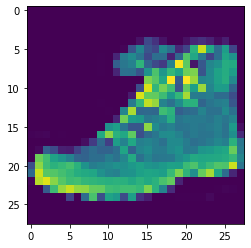

Support:  1
Connection: boot   Weight: 0.1
Visual Connections:  0


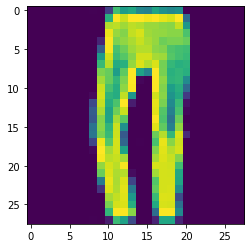

Support:  1
Connection: trouser   Weight: 0.1
Visual Connections:  0


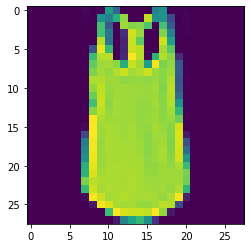

Support:  1
Connection: t-shirt   Weight: 0.1
Visual Connections:  0


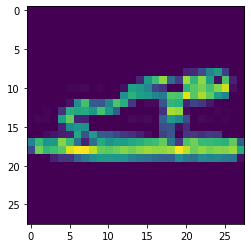

Support:  1
Connection: sandal   Weight: 0.1
Visual Connections:  0


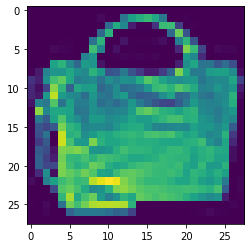

Support:  1
Connection: bag   Weight: 0.1
Visual Connections:  0


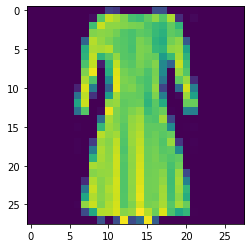

Support:  1
Connection: dress   Weight: 0.1
Visual Connections:  0


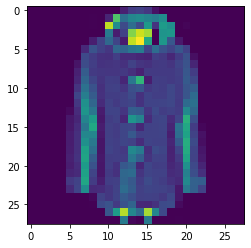

Support:  1
Connection: coat   Weight: 0.1
Visual Connections:  0


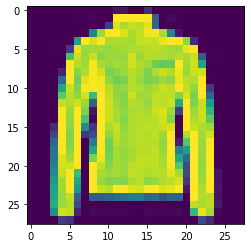

Support:  1
Connection: coat   Weight: 0.1
Visual Connections:  0


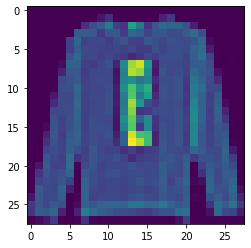

Support:  1
Connection: pullover   Weight: 0.1
Visual Connections:  0


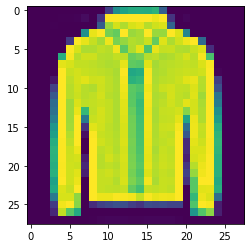

Support:  1
Connection: coat   Weight: 0.1
Visual Connections:  0


In [18]:
print(len(cortex.columns))

show = 10
shown = 0

for c in cortex.columns[400:]:
    if show == shown: break

    if c.input_type == 'visual':
        shown += 1

        plt.imshow(c.reference)
        plt.show()

        print('Support: ', c.support)

        visual = 0
        for k in c.connections:
            if k[0].input_type == 'text':
                print('Connection:', k[0].reference, '  Weight:', k[1])
            else:
                visual += 1
        print('Visual Connections: ', visual)

In [57]:
for c in cortex.columns:
    if c.input_type == 'text':
        print('Reference:', c.reference)
        print('Num Connections:', len(c.connections))
        print()

Reference: 5
Num Connections: 26

Reference: 0
Num Connections: 34

Reference: 4
Num Connections: 36

Reference: 1
Num Connections: 24

Reference: 9
Num Connections: 35

Reference: 2
Num Connections: 41

Reference: 3
Num Connections: 29

Reference: 6
Num Connections: 27

Reference: 7
Num Connections: 26

Reference: 8
Num Connections: 34

Reference: boot
Num Connections: 17

Reference: t-shirt
Num Connections: 31

Reference: dress
Num Connections: 36

Reference: pullover
Num Connections: 31

Reference: sneaker
Num Connections: 17

Reference: sandal
Num Connections: 37

Reference: trouser
Num Connections: 24

Reference: shirt
Num Connections: 45

Reference: coat
Num Connections: 34

Reference: bag
Num Connections: 36

Reference: 0
Num Connections: 1

Reference: digit
Num Connections: 10

Reference: 1
Num Connections: 1

Reference: 2
Num Connections: 1

Reference: 3
Num Connections: 1

Reference: 4
Num Connections: 1

Reference: 5
Num Connections: 1

Reference: 6
Num Connections: 1

Refer

In [ ]:
show = 1
shown = 0

for _ in range(1):
    incorrect_indexes.pop(0)

no_guess = 0
total = 0
for i in incorrect_indexes:
    if shown == show: break
    shown += 1

    print('INPUT IMAGE:')
    plt.imshow(X[i])
    plt.show()
    print()

    pred = cortex.force_visual_prediction(X[i])
    active_cols = cortex.get_active_cols()

    if len(active_cols) == 0:
        no_guess += 1
    total += 1

    for c in active_cols:

        if c.input_type == 'visual':
            print('ACTIVE VISUAL COLUMN:')

            plt.imshow(c.reference)
            plt.show()

            print('Activation: ', c.activation)
            print('Support: ', c.support)

            for k in c.connections:
                print('Connection:', k[0].reference, '  Weight:', k[1])
            print()
    
    for c in active_cols:
        if c.input_type == 'text':
            print('ACTIVE TEXT COLUMN:')
            print('Reference:', c.reference)
            print('Num Connections:', len(c.connections))
            print('Activation: ', c.activation)
            print()
    
    cortex.reset()

print(no_guess / total)